In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%206/Datasets/estudiantes.csv'
# Cargar los datos de la columna estudiante como índice del dataframe
df = pd.read_csv(url, index_col=0)


In [6]:
df.head

<bound method NDFrame.head of             Matematicas  Ciencias  Espanol  Historia  Deportes
Estudiante                                                    
Lucia               7.0       6.5      9.2       8.6       8.0
Pedro               7.5       9.4      7.3       7.0       7.0
Ines                7.6       9.2      8.0       8.0       7.5
Luis                5.0       6.5      6.5       7.0       9.0
Andres              6.0       6.0      7.8       8.9       7.3
Ana                 7.8       9.6      7.7       8.0       6.5
Carlos              6.3       6.4      8.2       9.0       7.2
Jose                7.9       9.7      7.5       8.0       6.0
Sonia               6.0       6.0      6.5       5.5       8.7
Maria               6.8       7.2      8.7       9.0       7.0>

In [7]:
df.describe()

,Matematicas,Ciencias,Espanol,Historia,Deportes
count,10.000000,10.000000,10.000000,10.000000,10.00000
mean,6.790000,7.650000,7.740000,7.900000,7.42000
std,0.951548,1.609865,0.860491,1.121507,0.92832
min,5.000000,6.000000,6.500000,5.500000,6.00000
25%,6.075000,6.425000,7.350000,7.250000,7.00000
50%,6.900000,6.850000,7.750000,8.000000,7.25000
75%,7.575000,9.350000,8.150000,8.825000,7.87500
max,7.900000,9.700000,9.200000,9.000000,9.00000


Se mira la media y mediana, para ver si estan cercanos los valores.

In [9]:
notas =df.iloc[:,[0, 1, 2 ,3 , 4]].values
notas
#  se convierte en array,para trabajar con la funcion del dendograma
#  no es necesario hacer este paso, lo hace automaticamente si le paso un dataframe

array([[7. , 6.5, 9.2, 8.6, 8. ],
       [7.5, 9.4, 7.3, 7. , 7. ],
       [7.6, 9.2, 8. , 8. , 7.5],
       [5. , 6.5, 6.5, 7. , 9. ],
       [6. , 6. , 7.8, 8.9, 7.3],
       [7.8, 9.6, 7.7, 8. , 6.5],
       [6.3, 6.4, 8.2, 9. , 7.2],
       [7.9, 9.7, 7.5, 8. , 6. ],
       [6. , 6. , 6.5, 5.5, 8.7],
       [6.8, 7.2, 8.7, 9. , 7. ]])

In [10]:
import scipy.cluster.hierarchy as sch 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#

In [12]:
# crear objeto, y la agrupación.
# Metrica ward, trabaja con las varianzas de los puntos
clus_je = linkage(notas,'ward')


In [13]:
clus_je
## es un array de varianza

array([[ 5.        ,  7.        ,  0.55677644,  2.        ],
       [ 4.        ,  6.        ,  0.65574385,  2.        ],
       [ 1.        ,  2.        ,  1.33790882,  2.        ],
       [ 0.        ,  9.        ,  1.39283883,  2.        ],
       [10.        , 12.        ,  1.71172428,  4.        ],
       [ 3.        ,  8.        ,  1.89472953,  2.        ],
       [11.        , 13.        ,  1.98620241,  4.        ],
       [15.        , 16.        ,  6.13038879,  6.        ],
       [14.        , 17.        ,  7.86837552, 10.        ]])

In [16]:
clus_je.shape

(9, 4)

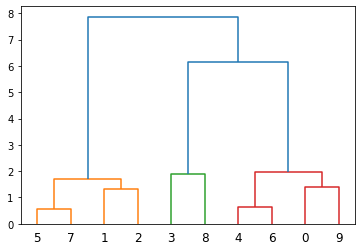

In [17]:
dendrograma = sch.dendrogram(clus_je)

>  $y$ esta el nivel de agrupamiento y en $x$ las notas.??? No, son indices de las clases? No las $x$ son las instancias, es decir las filas de la tabla de datos.

A la altura de nivel 2, cuantos clusters hay?

In [19]:
cluster = fcluster(clus_je,t=2,criterion='distance')

In [21]:
print(cluster)


[3 1 1 2 3 1 3 1 2 3]


cluster.shape

In [22]:
cluster_level1 = fcluster(clus_je, t=1, criterion='distance')
print(cluster_level1)


[7 2 3 4 6 1 6 1 5 8]


In [23]:
cluster_level7 = fcluster(clus_je, t=7, criterion='distance')
print(cluster_level7)


[2 1 1 2 2 1 2 1 2 2]


Ahora considerando los cluster se debe incluir los cluster (clase) en el dataframe

In [25]:
df['cluster'] = cluster

In [27]:
df

,Matematicas,Ciencias,Espanol,Historia,Deportes,cluster
Estudiante,,,,,,
Lucia,7.0,6.5,9.2,8.6,8.0,3
Pedro,7.5,9.4,7.3,7.0,7.0,1
Ines,7.6,9.2,8.0,8.0,7.5,1
Luis,5.0,6.5,6.5,7.0,9.0,2
Andres,6.0,6.0,7.8,8.9,7.3,3
Ana,7.8,9.6,7.7,8.0,6.5,1
Carlos,6.3,6.4,8.2,9.0,7.2,3
Jose,7.9,9.7,7.5,8.0,6.0,1
Sonia,6.0,6.0,6.5,5.5,8.7,2
